In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Student_Performance.csv")

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9.0,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,8.0,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4.0,2,23
9996,7,64,Yes,8.0,5,58
9997,6,83,Yes,8.0,5,74
9998,9,97,Yes,7.0,0,95


In [ ]:
df.isnull().sum()

Hours Studied                         0
Previous Scores                       0
Extracurricular Activities          120
Sleep Hours                          99
Sample Question Papers Practiced      0
Performance Index                     0
dtype: int64

In [ ]:
#Data Preprocessing
df['Extracurricular Activities'] = df['Extracurricular Activities'].fillna(df['Extracurricular Activities'].mode()[0])

In [ ]:
df.isnull().sum()

Hours Studied                        0
Previous Scores                      0
Extracurricular Activities           0
Sleep Hours                         99
Sample Question Papers Practiced     0
Performance Index                    0
dtype: int64

In [ ]:
df['Sleep Hours'] = df['Sleep Hours'].fillna(df['Sleep Hours'].mean)

In [ ]:
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9.0,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,8.0,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4.0,2,23
9996,7,64,Yes,8.0,5,58
9997,6,83,Yes,8.0,5,74
9998,9,97,Yes,7.0,0,95


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
import numpy as np

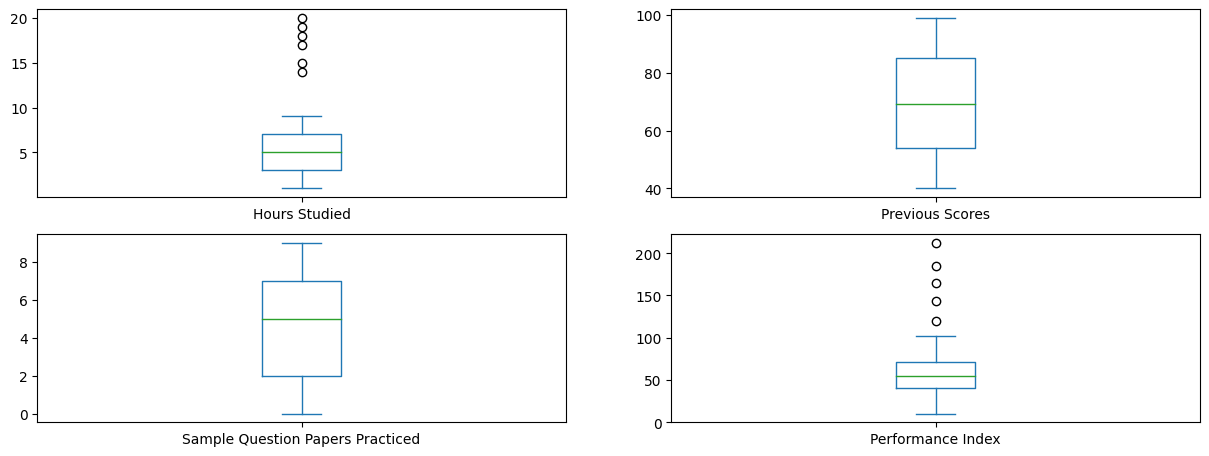

In [ ]:
df.plot(kind = "box", subplots = True, layout = (7,2), figsize = (15,20));

In [ ]:
def InterQuartile(col):
  outliers = []
  filtered = []
  q1 = np.quantile(col,0.25)
  q3 = np.quantile(col,0.75)
  iqr = q3 - q1
  for i in col:
    if i > q1 - 1.5*iqr and i < q3 + 1.5 * iqr:
      filtered.append(i)
    else:
      outliers.append(i)
  return outliers

In [ ]:
s1 = InterQuartile(df['Performance Index'])
print("Outliers in Performance Index:" + str(s1))

Outliers in Performance Index:[120, 143, 185, 165, 212]


In [ ]:
s2 = InterQuartile(df['Hours Studied'])
print("Outliers in Hours Studied:" + str(s2))

Outliers in Hours Studied:[14, 20, 15, 19, 18, 17]


In [ ]:
import numpy as np

def replace_outliers_with_nan(df, col):
    # Calculate the first quartile (Q1)
    q1 = df[col].quantile(0.25)

    # Calculate the third quartile (Q3)
    q3 = df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outlier replacement
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    #print("HII" + str(upper_bound))
    # Replace outlier values with NaN for the specified column
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

    return df


In [ ]:
df.dtypes

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                         object
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object

In [ ]:
#Replacing outliers with null values
df = replace_outliers_with_nan(df, 'Performance Index')
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   5
dtype: int64

In [ ]:
df['Performance Index'] = df['Performance Index'].fillna(df['Performance Index'].mean())
df['Performance Index'].isnull().sum()

0

In [ ]:
df = replace_outliers_with_nan(df, 'Hours Studied')
df.isnull().sum()

Hours Studied                       6
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df['Hours Studied'] = df['Hours Studied'].fillna(df['Hours Studied'].mean())
df['Hours Studied'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

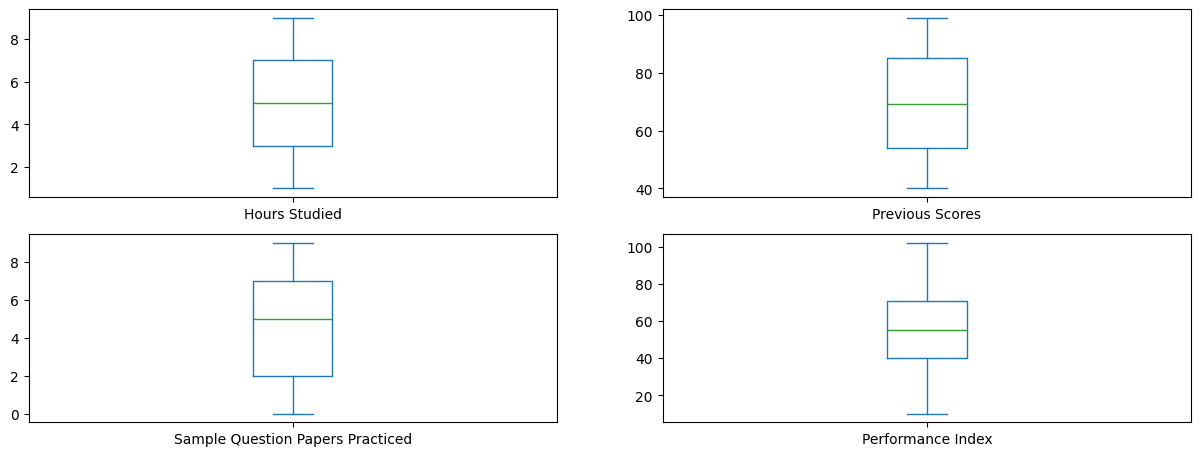

In [ ]:
df.plot(kind = "box", subplots = True, layout = (7,2), figsize = (15,20));

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
for col in df.columns:
  if(df[col].dtype != 'object'):
    model = scaler.fit(df[[col]])
    print("Max value in:" + col + str(scaler.data_max_))
    print("Min value in:" + col + str(scaler.data_min_))
    print()
    df[col] = model.transform(df[[col]])

Max value in:Hours Studied[9.]
Min value in:Hours Studied[1.]

Max value in:Previous Scores[99.]
Min value in:Previous Scores[40.]

Max value in:Sample Question Papers Practiced[9.]
Min value in:Sample Question Papers Practiced[0.]

Max value in:Performance Index[102.]
Min value in:Performance Index[10.]



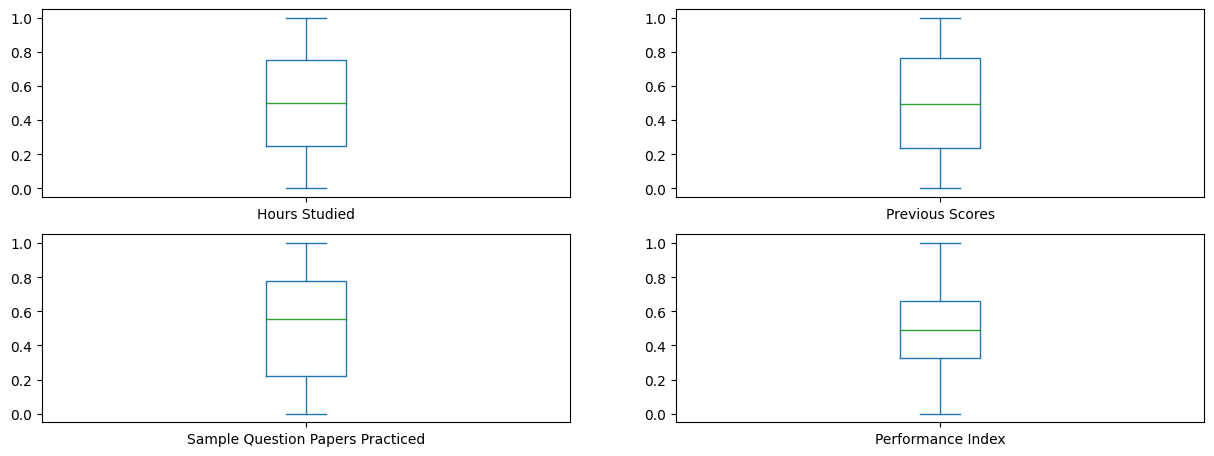

In [ ]:
df.plot(kind = "box", subplots = True, layout = (7,2), figsize = (15,20));